In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime

In [3]:
import os
print(os.getcwd())

d:\IT_HCMUTE\Hoc_ki_6\BIG_DATA\BIGDATA_PROJECT\Data_Visualization


In [11]:
print(os.path.exists(r'D:\IT_HCMUTE\Hoc_ki_6\BIG_DATA\BIGDATA_PROJECT\CrawlDataLib\data\ree.json'))

True


In [13]:
data = pd.read_json(r'D:\IT_HCMUTE\Hoc_ki_6\BIG_DATA\BIGDATA_PROJECT\CrawlDataLib\data\ree.json')

In [15]:
data['Ngày'] = pd.to_datetime(data['Ngày'], format='%d/%m/%Y')

In [16]:
data = data.sort_values('Ngày')

In [17]:
data['Giá đóng cửa'] = data['Giá đóng cửa'].astype(float)
data['Giá mở cửa'] = data['Giá mở cửa'].astype(float)
data['Giá cao nhất'] = data['Giá cao nhất'].astype(float)
data['Giá thấp nhất'] = data['Giá thấp nhất'].astype(float)
data['Khối lượng khớp lệnh'] = data['Khối lượng khớp lệnh'].astype(float)

In [18]:
recent_data = data[data['Ngày'] >= '2024-05-01']

In [19]:
recent_data.head()

,Ngày,Giá đóng cửa,Giá điều chỉnh,Thay đổi,Khối lượng khớp lệnh,Giá trị khớp lệnh,Khối lượng thỏa thuận,Giá trị thỏa thuận,Giá mở cửa,Giá cao nhất,Giá thấp nhất
249,2024-05-02,64.2,55.07,2.6(4.22 %),2464900.0,155.361,0,0.00,61.2,64.2,61.0
248,2024-05-03,65.9,56.53,1.7(2.65 %),3663300.0,239.471,0,0.00,64.2,65.9,64.2
247,2024-05-06,65.3,56.01,-0.6(-0.91 %),1612200.0,105.626,0,0.00,66.3,66.3,65.1
246,2024-05-07,65.0,55.76,-0.3(-0.46 %),1418700.0,92.511,0,0.00,65.9,65.9,64.8
245,2024-05-08,66.4,56.96,1.4(2.15 %),3576700.0,236.577,1700000,112.03,65.6,66.6,64.7


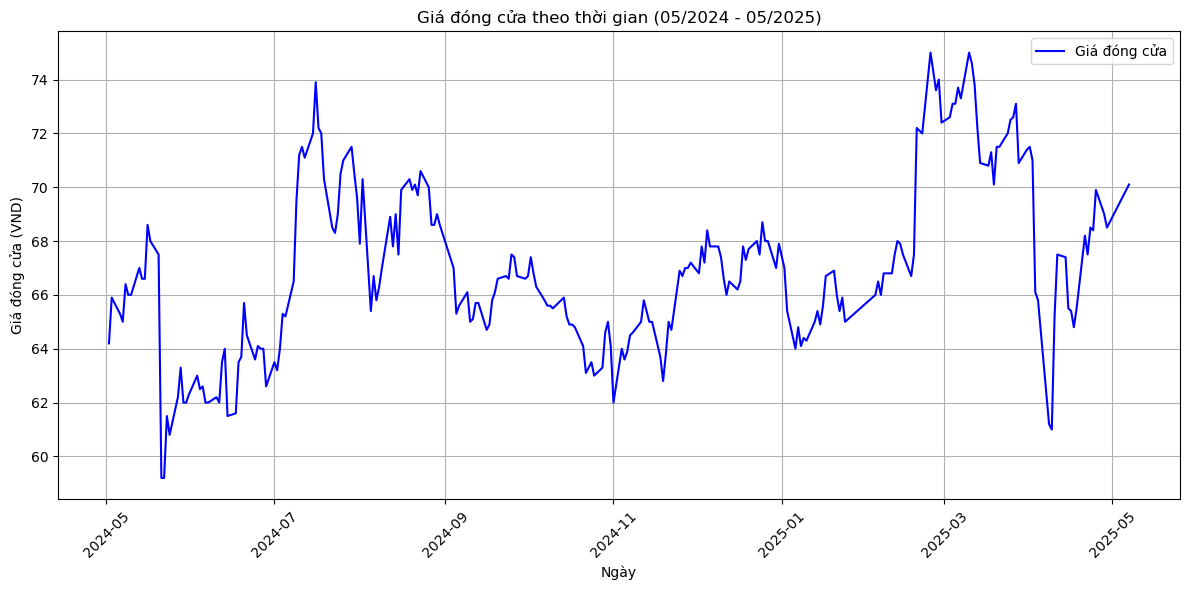

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(recent_data['Ngày'], recent_data['Giá đóng cửa'], label='Giá đóng cửa', color='blue')
plt.title('Giá đóng cửa theo thời gian (05/2024 - 05/2025)')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa (VND)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(
    x=recent_data['Ngày'],
    open=recent_data['Giá mở cửa'],
    high=recent_data['Giá cao nhất'],
    low=recent_data['Giá thấp nhất'],
    close=recent_data['Giá đóng cửa']
)])

fig.update_layout(
    title='Biểu đồ nến giá cổ phiếu (05/2024 - 05/2025)',
    xaxis_title='Ngày',
    yaxis_title='Giá (VND)',
    xaxis_rangeslider_visible=False
)

fig.show()

In [22]:
import plotly.io as pio
pio.renderers.default = 'vscode'

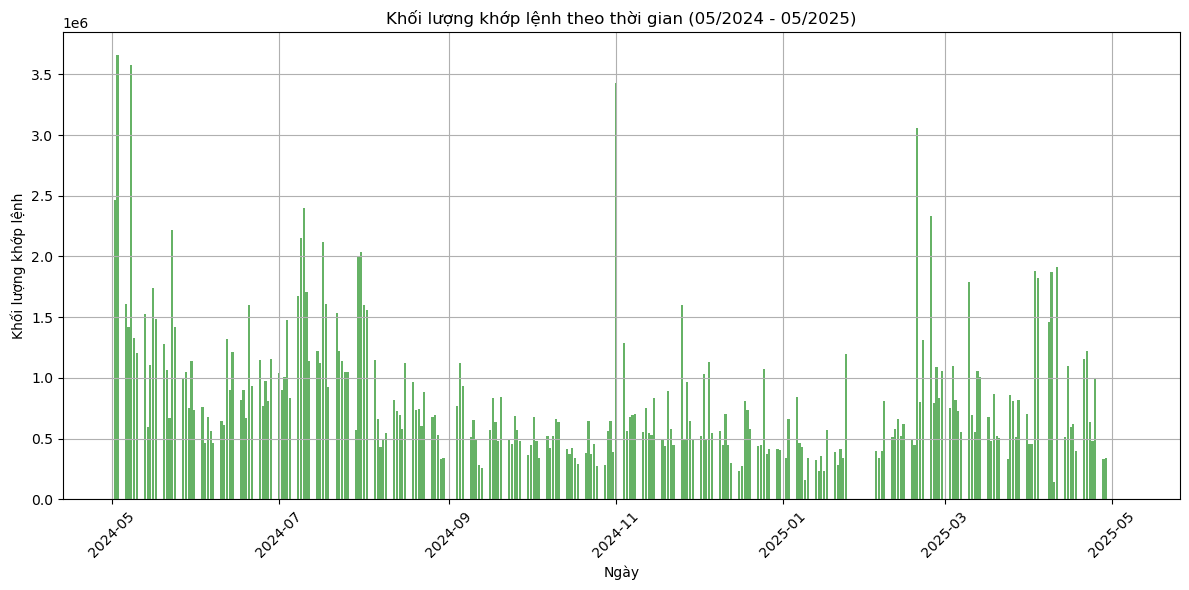

In [23]:
# Vẽ biểu đồ cột cho khối lượng khớp lệnh
plt.figure(figsize=(12, 6))
plt.bar(recent_data['Ngày'], recent_data['Khối lượng khớp lệnh'], color='green', alpha=0.6)
plt.title('Khối lượng khớp lệnh theo thời gian (05/2024 - 05/2025)')
plt.xlabel('Ngày')
plt.ylabel('Khối lượng khớp lệnh')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

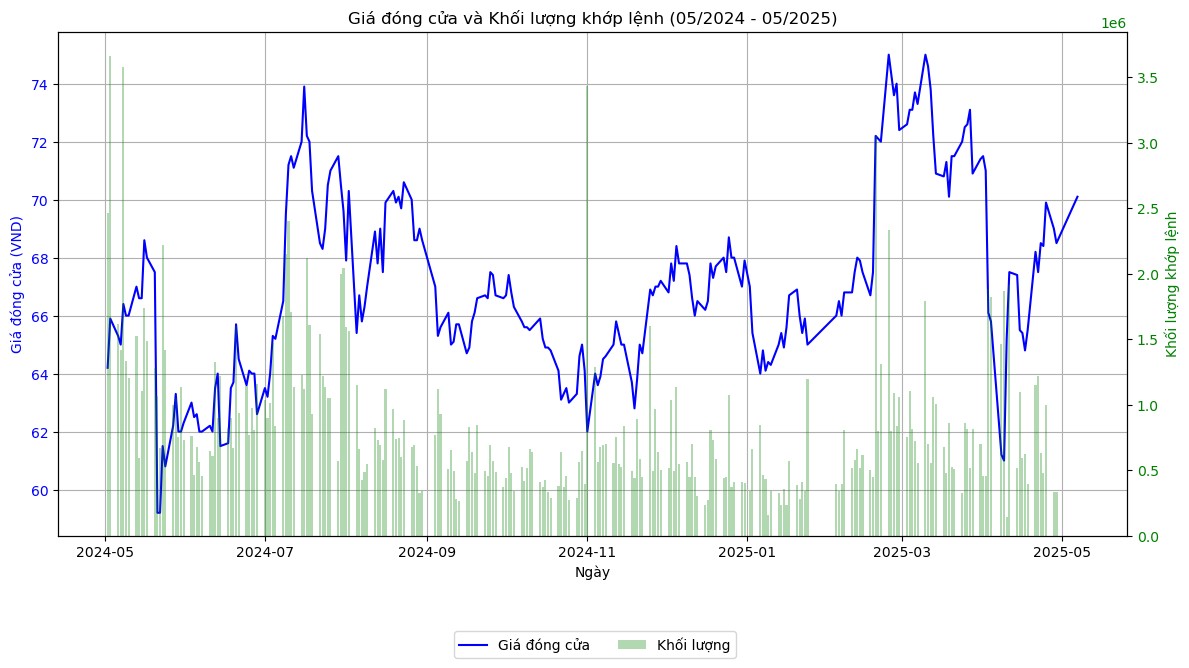

In [24]:
# Vẽ biểu đồ kết hợp giá đóng cửa và khối lượng
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ giá đóng cửa
ax1.plot(recent_data['Ngày'], recent_data['Giá đóng cửa'], color='blue', label='Giá đóng cửa')
ax1.set_xlabel('Ngày')
ax1.set_ylabel('Giá đóng cửa (VND)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Tạo trục y thứ hai cho khối lượng
ax2 = ax1.twinx()
ax2.bar(recent_data['Ngày'], recent_data['Khối lượng khớp lệnh'], color='green', alpha=0.3, label='Khối lượng')
ax2.set_ylabel('Khối lượng khớp lệnh', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Tiêu đề và xoay nhãn
plt.title('Giá đóng cửa và Khối lượng khớp lệnh (05/2024 - 05/2025)')
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.xticks(rotation=45)
plt.show()

In [25]:
recent_data = data[(data['Ngày'] >= '2025-01-01') & (data['Ngày'] <= '2025-05-07')]  # Ví dụ: 3 tháng gần nhất

C:\Users\LEGION\AppData\Local\Temp\ipykernel_22128\1876775473.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



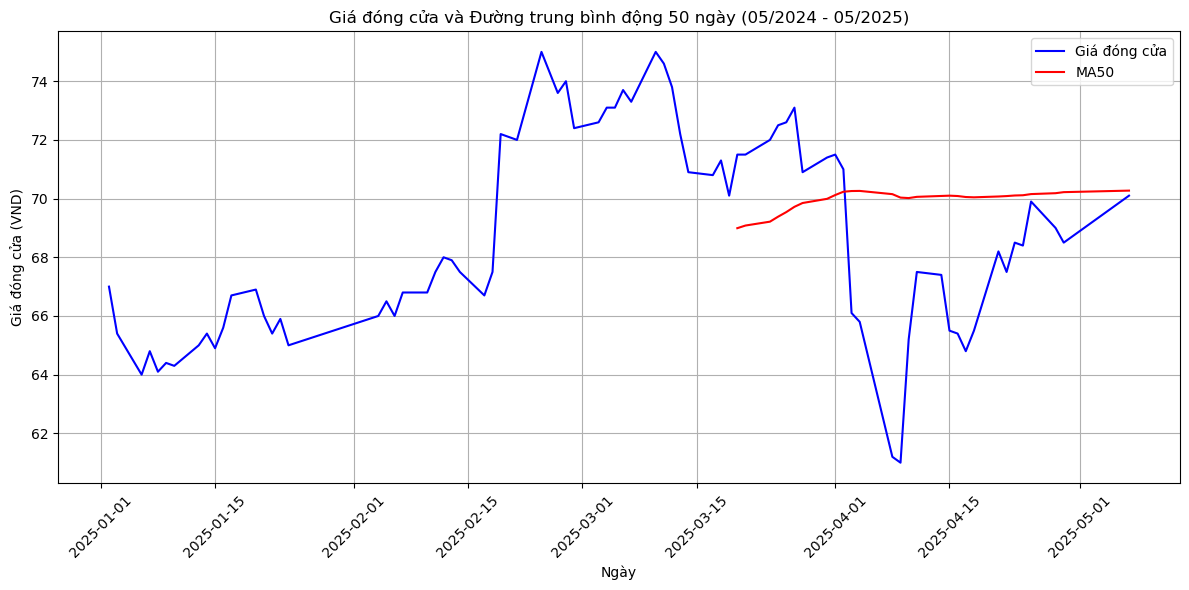

In [27]:
# Tính đường trung bình động 50 ngày
recent_data['MA50'] = recent_data['Giá đóng cửa'].rolling(window=50).mean()

# Vẽ biểu đồ giá đóng cửa và MA50
plt.figure(figsize=(12, 6))
plt.plot(recent_data['Ngày'], recent_data['Giá đóng cửa'], label='Giá đóng cửa', color='blue')
plt.plot(recent_data['Ngày'], recent_data['MA50'], label='MA50', color='red')
plt.title('Giá đóng cửa và Đường trung bình động 50 ngày (05/2024 - 05/2025)')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa (VND)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('chart.png')
plt.show()

In [28]:
# Tính đường trung bình động 50 ngày cho dữ liệu gần đây
recent_data['MA50'] = recent_data['Giá đóng cửa'].rolling(window=50).mean()

# Vẽ biểu đồ giá đóng cửa và MA50
fig = go.Figure()

# Thêm đường giá đóng cửa
fig.add_trace(go.Scatter(x=recent_data['Ngày'], y=recent_data['Giá đóng cửa'], 
                         mode='lines', name='Giá đóng cửa', line=dict(color='blue')))

# Thêm đường MA50
fig.add_trace(go.Scatter(x=recent_data['Ngày'], y=recent_data['MA50'], 
                         mode='lines', name='MA50', line=dict(color='red')))

fig.update_layout(
    title='Giá đóng cửa và Trung bình động 50 ngày (05/2024 - 05/2025)',
    xaxis_title='Ngày',
    yaxis_title='Giá (VND)',
    xaxis_rangeslider_visible=True
)

fig.show()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_22128\434282203.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
import plotly.express as px
# Tạo cột năm và tháng
data['Năm'] = data['Ngày'].dt.year
data['Tháng'] = data['Ngày'].dt.month

# Tính giá đóng cửa trung bình theo năm và tháng
heatmap_data = data.pivot_table(values='Giá đóng cửa', index='Năm', columns='Tháng', aggfunc='mean')

# Vẽ biểu đồ nhiệt
fig = px.imshow(heatmap_data, 
                labels=dict(x='Tháng', y='Năm', color='Giá đóng cửa (VND)'),
                title='Biểu đồ nhiệt giá đóng cửa trung bình theo năm và tháng (2000-2025)',
                color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title='Tháng',
    yaxis_title='Năm'
)
fig.show()